In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# Load the dataset with header=None to set column names explicitly
file_path = "C:\\Users\\Pc\\Downloads\\archive(2)\\twitter_training.csv"
column_names = ['ID', 'entity', 'sentiment', 'comment']
twitter = pd.read_csv('C:\\Users\\Pc\\Downloads\\archive(2)\\twitter_training.csv', header=None, names=column_names)
df = pd.read_csv(file_path, header=None)
twitter.shape

(74682, 4)

In [112]:
# Count of unique entities
game_counts = twitter['entity'].value_counts()
print(game_counts)
twitter.info()

# Display the first 10 rows to understand the structure
twitter.head(10)

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [16]:
# Display the number of rows and columns in the DataFrame
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 74682
Number of columns: 4


In [13]:
# Check the number of missing values in column 3
missing_values_count = df[3].isnull().sum()
print("Number of missing values in column 3:", missing_values_count)

Number of missing values in column 3: 686


In [17]:
# Drop rows with missing values in the column
df = df.dropna(subset=[3])

# Convert all values in the column to strings
df[3] = df[3].astype(str)

# Apply sentiment analysis to the column containing tweet text (index 3)
df['Sentiment'] = df[3].apply(analyze_sentiment)

In [18]:
# Check the number of missing values in column 3
missing_values_count = df[3].isnull().sum()
print("Number of missing values in column 3:", missing_values_count)

Number of missing values in column 3: 0


In [19]:
# Display the number of rows and columns in the DataFrame
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 73996
Number of columns: 5


In [24]:
# Apply sentiment analysis to the column containing tweet text (index 3)
df['Sentiment'] = df[3].apply(analyze_sentiment)

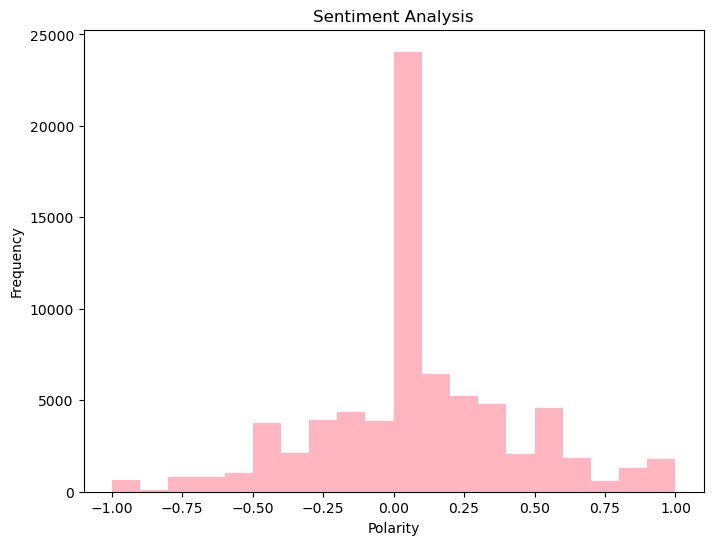

In [26]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=20, color='lightpink')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [32]:
#Boxplot of Sentiment Scores by Category
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Display the column names in your DataFrame
print(df.columns)

Index([0, 1, 2, 3, 'Sentiment'], dtype='object')


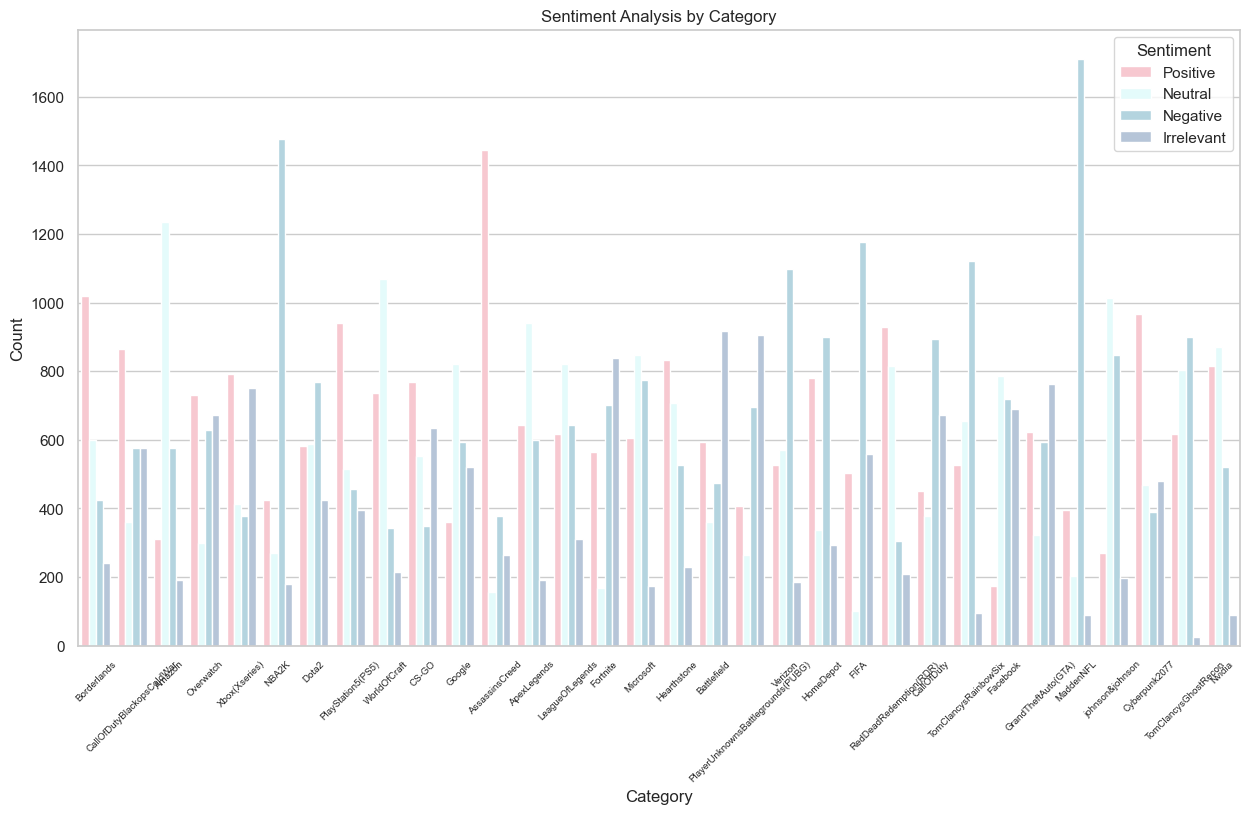

In [149]:
plt.figure(figsize=(15, 8))
custom_palette = {'Positive': 'pink', 'Neutral': 'lightcyan', 'Negative': 'lightblue', 'Irrelevant': 'lightsteelblue'}
sns.countplot(x='entity', hue='sentiment', data=twitter, palette=custom_palette)
plt.title('Sentiment Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=7)
plt.legend(title='Sentiment')
plt.show()

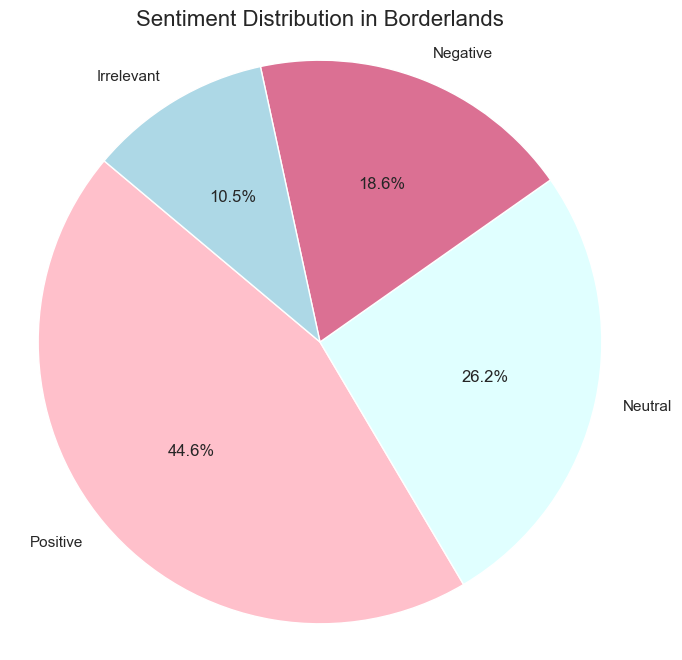

In [132]:
# Replace 'YourDesiredCategory' with the specific category you want to analyze
desired_category = 'Borderlands'  # Example category

# Filter data for the desired category
category_data = twitter[twitter['entity'] == desired_category]

# Count sentiment occurrences within the category
sentiment_counts = category_data['sentiment'].value_counts()

# Create a pie chart to represent sentiment distribution within the category
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, startangle=140, autopct='%1.1f%%', colors=['pink','lightCyan','palevioletred', 'lightblue'])
plt.title(f'Sentiment Distribution in {desired_category}', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



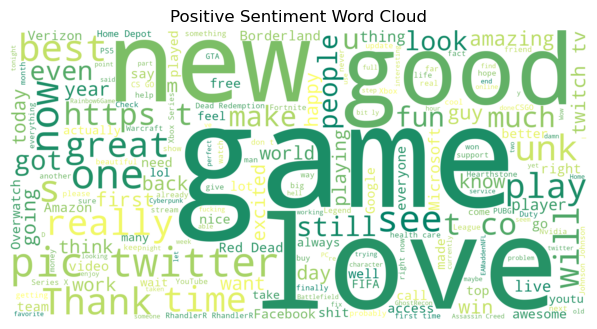

In [69]:
#Word Clouds for Positive Sentiments
from wordcloud import WordCloud

positive_tweets = df[df['Sentiment'] > 0][3].str.cat(sep=' ')
negative_tweets = df[df['Sentiment'] < 0][3].str.cat(sep=' ')

# Create word clouds for positive and negative sentiments
wordcloud_positive = WordCloud(width=2000, height=1000, background_color='white', colormap='summer').generate(positive_tweets)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


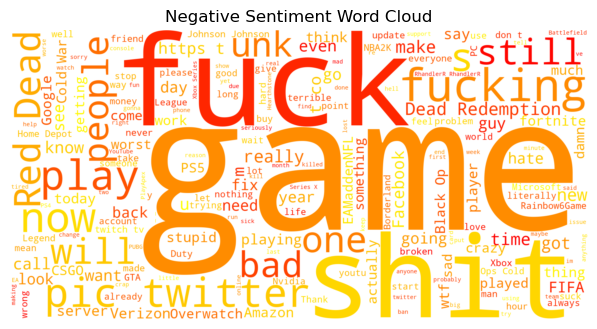

In [68]:
#Word Clouds for Negative Sentiments
from wordcloud import WordCloud

positive_tweets = df[df['Sentiment'] > 0][3].str.cat(sep=' ')
negative_tweets = df[df['Sentiment'] < 0][3].str.cat(sep=' ')

# Create word clouds for positive and negative sentiments
wordcloud_negative = WordCloud(width=2000, height=1000,background_color='white', colormap='autumn').generate(negative_tweets)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

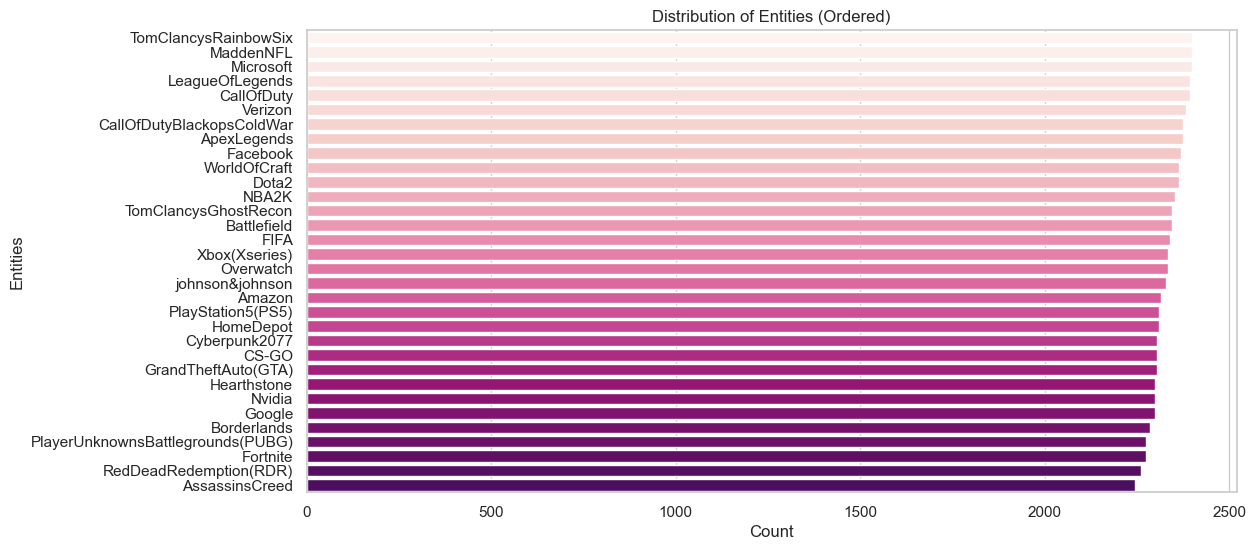

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'entity' is the column name containing the entities
entity_order = twitter['entity'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(y='entity', data=twitter, palette='RdPu', order=entity_order)
plt.title('Distribution of Entities (Ordered)')
plt.xlabel('Count')
plt.ylabel('Entities')
plt.show()
